In [15]:
from typing import Callable, AsyncIterable
from moveread.core import CoreAPI
import pure_cv as vc
from haskellian import either as E, iter as I, Iter, promise as P, AsyncIter
from moveread.export import core_samples, export_dataset, Sample, export_tfrecords
import tensorflow as tf
import tf_ocr as ocr

In [16]:
N = 10
core = CoreAPI.at(f'/home/m4rs/mr-github/rnd/data/moveread-pipelines/data/demo{N}/core-out')

In [17]:
await export_tfrecords(core, 'core10')

1024 / unknown - elapsed 12.2 secs

2024-04-25 16:42:42.727967: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1402 / unknown - elapsed 15.9 secs

2024-04-25 16:42:46.424752: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [20]:
Dtf = ocr.deserialize_dataset(['core10/data_0.tfrecord.gz'], compression='GZIP')

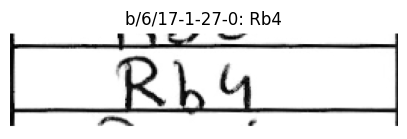

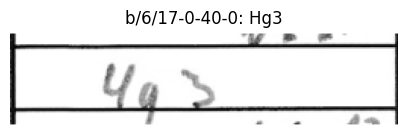

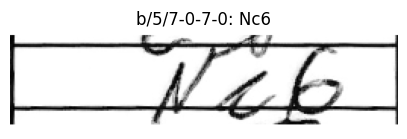

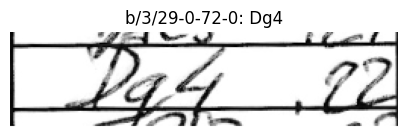

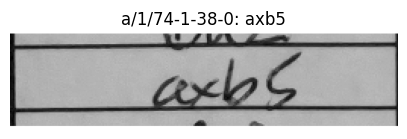

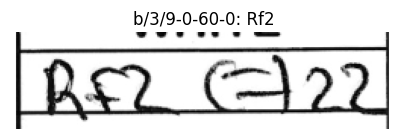

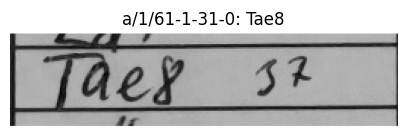

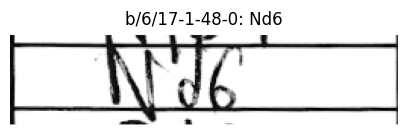

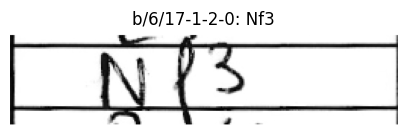

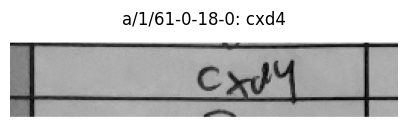

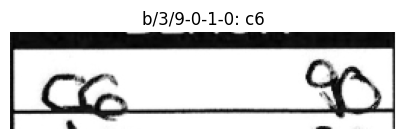

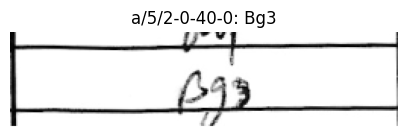

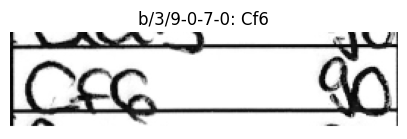

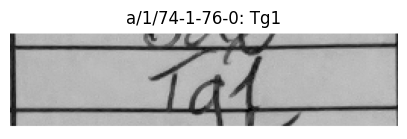

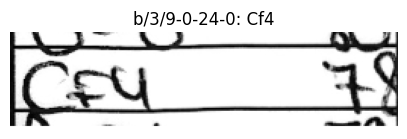

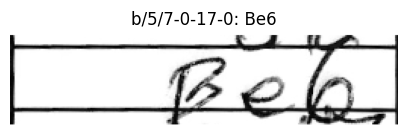

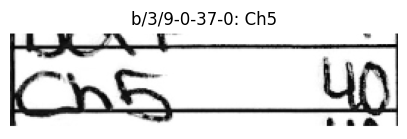

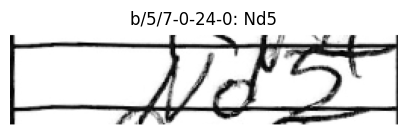

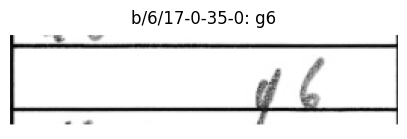

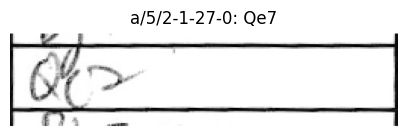

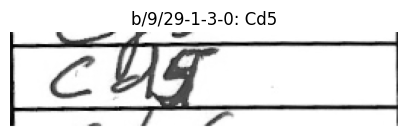

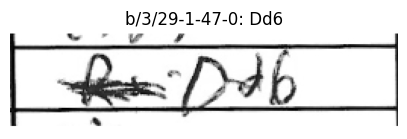

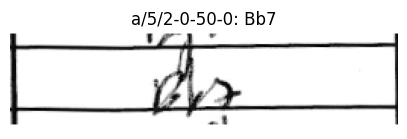

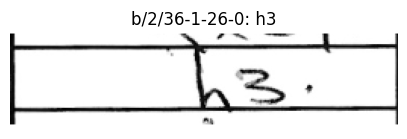

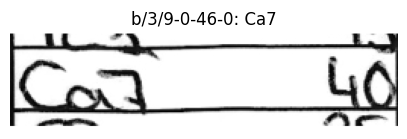

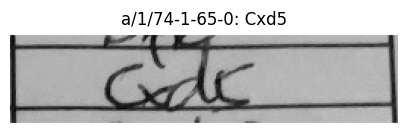

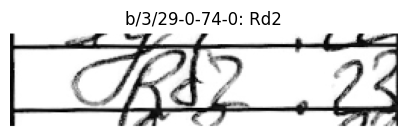

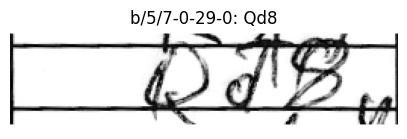

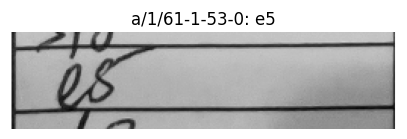

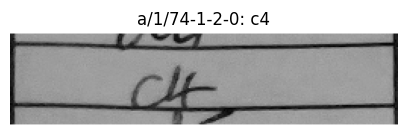

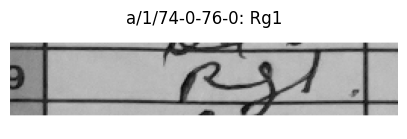

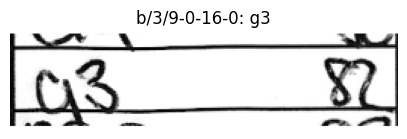

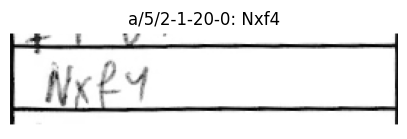

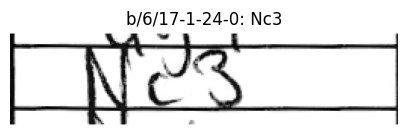

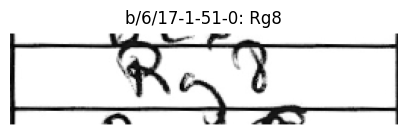

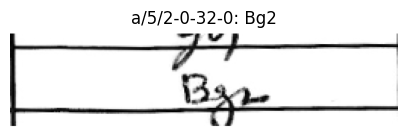

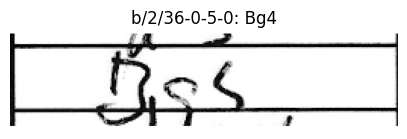

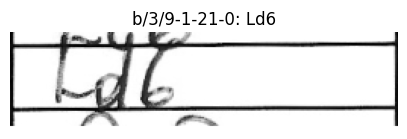

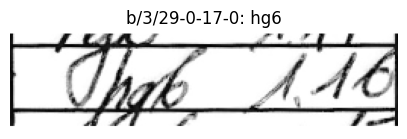

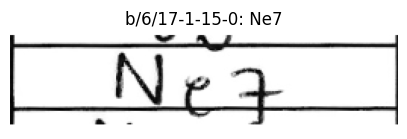

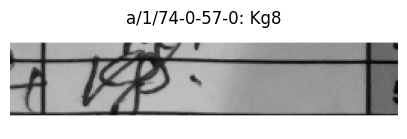

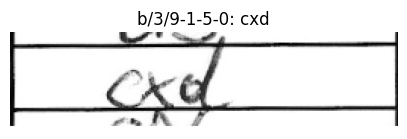

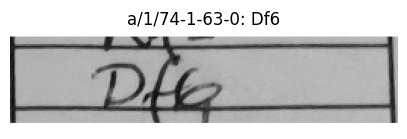

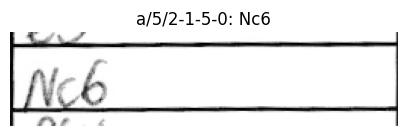

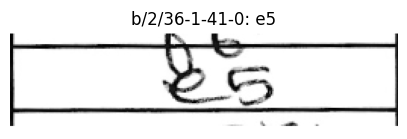

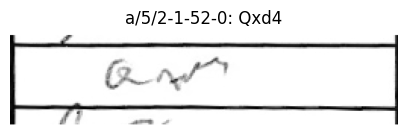

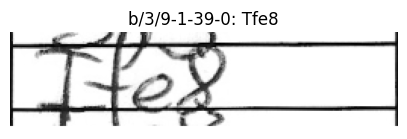

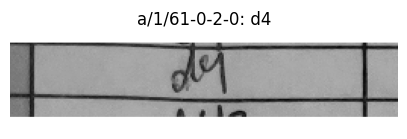

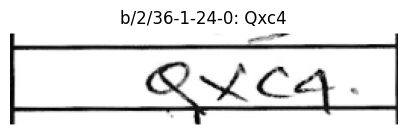

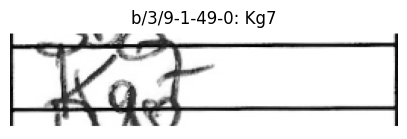

2024-04-25 16:43:18.930493: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [21]:
for x in Dtf.shuffle(1024).take(50):
  txt = f"{x['boxid'].numpy().decode()}: {x['label'].numpy().decode()}"
  display(vc.show((txt, ocr.unflip(x['image']))))